In [1]:
import pandas as pd
import numpy as np
from capstone_group05 import drop_unnecessary_columns, format_and_rename_time_column,fillna_with_mode

In [2]:
# df = pd.read_csv("./Crash_Reporting_-_Drivers_Data.csv")
df = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD")

C:\Users\37199\AppData\Local\Temp\ipykernel_12392\3124655422.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://data.montgomerycountymd.gov/api/views/mmzv-x632/rows.csv?accessType=DOWNLOAD")


In [3]:
df.shape

(167491, 43)

In [5]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,MCP3040003N,190026050,Montgomery County Police,Property Damage Crash,05/31/2019 03:00:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 3215 SPARTAN RD,...,15,No,No,2004,HONDA,TK,UNKNOWN,39.150044,-77.063089,"(39.15004368, -77.06308884)"
1,EJ78850038,230034791,Gaithersburg Police Depar,Property Damage Crash,07/21/2023 05:59:00 PM,Maryland (State),FREDERICK RD,Unknown,WATKINS MILL RD,NaN,...,40,No,No,2011,GMC,TK,NO MISUSE,39.159264,-77.219025,"(39.1592635, -77.21902483)"
2,MCP2009002G,230034583,Montgomery County Police,Property Damage Crash,07/20/2023 03:10:00 PM,Maryland (State),GEORGIA AVE,Maryland (State),NORBECK RD,NaN,...,35,No,No,2019,FORD,F150,NO MISUSE,39.109535,-77.075806,"(39.10953506, -77.07580619)"
3,MCP3201004C,230035036,Montgomery County Police,Property Damage Crash,07/23/2023 12:10:00 PM,County,CRYSTAL ROCK DR,County,WATERS LANDING DR,NaN,...,40,No,No,2016,KIA,SW,NO MISUSE,39.190149,-77.266766,"(39.19014917, -77.26676583)"
4,MCP23290028,230035152,Montgomery County Police,Property Damage Crash,07/24/2023 06:10:00 AM,County,MONTGOMERY VILLAGE AVE,County,CENTERWAY RD,NaN,...,35,No,No,2016,TOYT,TK,NO MISUSE,39.172558,-77.203745,"(39.17255801, -77.20374546)"


In [6]:
uncessary_cols=['Latitude','Agency Name','Route Type', 'Road Name', 'Report Number', 'Longitude', 'Location', 'Person ID', 'Vehicle ID', 'Cross-Street Type', 'Cross-Street Name', 'Municipality', 'Off-Road Description']
drop_unnecessary_columns(df,uncessary_cols)

In [7]:
df.shape

(167491, 30)

In [8]:
df.columns

Index(['Local Case Number', 'ACRS Report Type', 'Crash Date/Time',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems'],
      dtype='object')

In [9]:
format_and_rename_time_column(df,'Crash Date/Time','Crash Time')

In [10]:
null_records = df[df.isnull().any(axis=1)]
null_records

,Local Case Number,ACRS Report Type,Crash Time,Related Non-Motorist,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,...,Vehicle Movement,Vehicle Continuing Dir,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems
0,190026050,Property Damage Crash,03:00:00 PM,NaN,OTHER,CLEAR,NaN,DAYLIGHT,NaN,UNKNOWN,...,PARKING,North,North,15,No,No,2004,HONDA,TK,UNKNOWN
1,230034791,Property Damage Crash,05:59:00 PM,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,...,MAKING LEFT TURN,East,South,40,No,No,2011,GMC,TK,NO MISUSE
2,230034583,Property Damage Crash,03:10:00 PM,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,...,ACCELERATING,North,North,35,No,No,2019,FORD,F150,NO MISUSE
3,230035036,Property Damage Crash,12:10:00 PM,NaN,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,STARTING FROM LANE,East,East,40,No,No,2016,KIA,SW,NO MISUSE
4,230035152,Property Damage Crash,06:10:00 AM,NaN,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,TRAFFIC SIGNAL,NONE DETECTED,...,MAKING LEFT TURN,West,North,35,No,No,2016,TOYT,TK,NO MISUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167486,16010228,Property Damage Crash,10:01:00 AM,NaN,OTHER,CLEAR,DRY,DAYLIGHT,NaN,NaN,...,SLOWING OR STOPPING,East,East,25,No,No,2016,FORD,EXPLORER,NO MISUSE
167487,170519976,Property Damage Crash,02:22:00 PM,NaN,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,NaN,...,SLOWING OR STOPPING,East,East,35,No,No,2008,NISSAN,ALTIMA,NO MISUSE
167488,200046217,Property Damage Crash,07:37:00 AM,NaN,SAME DIR REAR END,CLOUDY,DRY,DAYLIGHT,NO CONTROLS,NONE DETECTED,...,SLOWING OR STOPPING,North,North,40,No,No,2008,CHEVROLET,EXPRESS,NO MISUSE
167489,190056701,Property Damage Crash,11:23:00 PM,NaN,ANGLE MEETS LEFT TURN,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,...,MAKING LEFT TURN,East,South,35,No,No,2018,FORD,TRANSIT VAN,NO MISUSE


In [11]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                      0
ACRS Report Type                       0
Crash Time                             0
Related Non-Motorist              162183
Collision Type                       569
Weather                            13011
Surface Condition                  19636
Light                               1391
Traffic Control                    24886
Driver Substance Abuse             30518
Non-Motorist Substance Abuse      163296
Driver At Fault                        0
Injury Severity                        0
Circumstance                      136993
Driver Distracted By                   0
Drivers License State               9588
Vehicle Damage Extent                302
Vehicle First Impact Location        156
Vehicle Second Impact Location       256
Vehicle Body Type                   2573
Vehicle Movement                     371
Vehicle Continuing Dir              2602
Vehicle Going Dir                   2602
Speed Limit                            0
Driverless Vehic

In [12]:
df.shape

(167491, 30)

In [13]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Local Case Number                  0.000000
ACRS Report Type                   0.000000
Crash Time                         0.000000
Related Non-Motorist              96.830874
Collision Type                     0.339720
Weather                            7.768179
Surface Condition                 11.723615
Light                              0.830492
Traffic Control                   14.858112
Driver Substance Abuse            18.220681
Non-Motorist Substance Abuse      97.495388
Driver At Fault                    0.000000
Injury Severity                    0.000000
Circumstance                      81.791260
Driver Distracted By               0.000000
Drivers License State              5.724487
Vehicle Damage Extent              0.180308
Vehicle First Impact Location      0.093139
Vehicle Second Impact Location     0.152844
Vehicle Body Type                  1.536202
Vehicle Movement                   0.221504
Vehicle Continuing Dir             1.553516
Vehicle Going Dir               

In [14]:
for column in df.columns:
    if missing_percentage[column] > 70:
        df.drop(column, axis=1, inplace= True)

In [15]:
df.columns

Index(['Local Case Number', 'ACRS Report Type', 'Crash Time', 'Collision Type',
       'Weather', 'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Driver At Fault', 'Injury Severity',
       'Driver Distracted By', 'Drivers License State',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems'],
      dtype='object')

In [16]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                     0
ACRS Report Type                      0
Crash Time                            0
Collision Type                      569
Weather                           13011
Surface Condition                 19636
Light                              1391
Traffic Control                   24886
Driver Substance Abuse            30518
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              9588
Vehicle Damage Extent               302
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2573
Vehicle Movement                    371
Vehicle Continuing Dir             2602
Vehicle Going Dir                  2602
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Vehicle Make                         23


In [17]:
fillna_with_mode(df,'Equipment Problems')

In [18]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                     0
ACRS Report Type                      0
Crash Time                            0
Collision Type                      569
Weather                           13011
Surface Condition                 19636
Light                              1391
Traffic Control                   24886
Driver Substance Abuse            30518
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              9588
Vehicle Damage Extent               302
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2573
Vehicle Movement                    371
Vehicle Continuing Dir             2602
Vehicle Going Dir                  2602
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Vehicle Make                         23


In [19]:
Columns_to_Drop = ['Weather', 'Surface Condition', 'Drivers License State', 'Driver Substance Abuse', 'Traffic Control', 'Collision Type', 'Light', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Vehicle Make', 'Vehicle Model']
df = df.dropna(subset=Columns_to_Drop)

In [20]:
null_counts = df.isnull().sum()
null_counts

Local Case Number                 0
ACRS Report Type                  0
Crash Time                        0
Collision Type                    0
Weather                           0
Surface Condition                 0
Light                             0
Traffic Control                   0
Driver Substance Abuse            0
Driver At Fault                   0
Injury Severity                   0
Driver Distracted By              0
Drivers License State             0
Vehicle Damage Extent             0
Vehicle First Impact Location     0
Vehicle Second Impact Location    0
Vehicle Body Type                 0
Vehicle Movement                  0
Vehicle Continuing Dir            0
Vehicle Going Dir                 0
Speed Limit                       0
Driverless Vehicle                0
Parked Vehicle                    0
Vehicle Year                      0
Vehicle Make                      0
Vehicle Model                     0
Equipment Problems                0
dtype: int64

In [21]:
df.shape

(96038, 27)

In [22]:
df.describe()

,Speed Limit,Vehicle Year
count,96038.000000,96038.000000
mean,35.169048,2009.147379
std,7.860499,98.378599
min,0.000000,0.000000
25%,30.000000,2006.000000
50%,35.000000,2011.000000
75%,40.000000,2015.000000
max,75.000000,9999.000000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

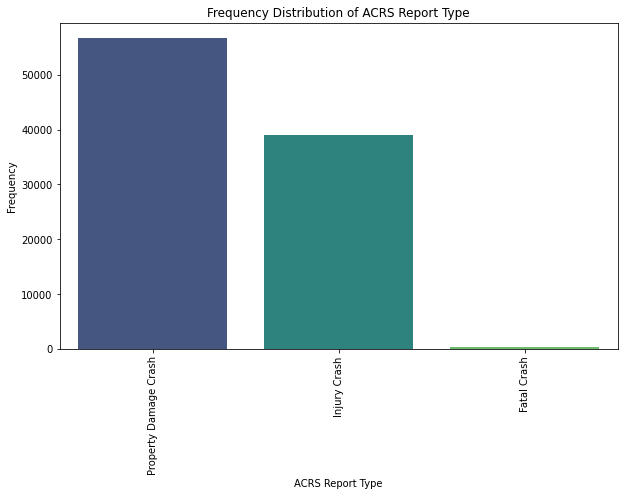

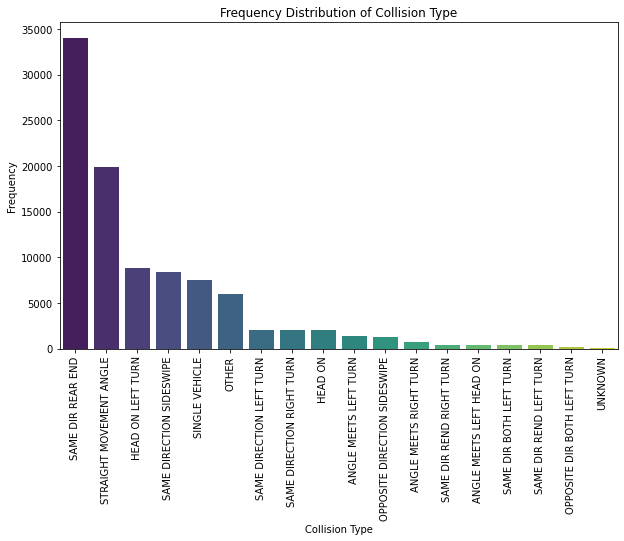

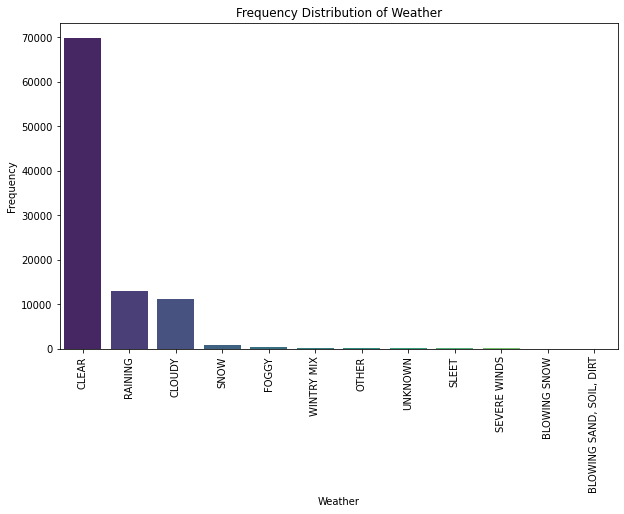

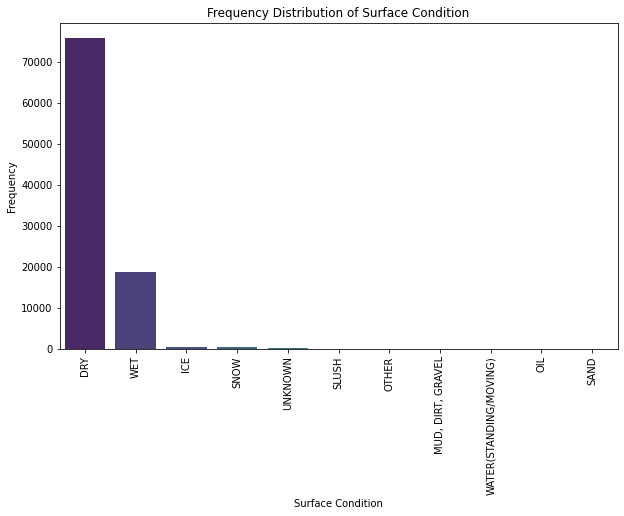

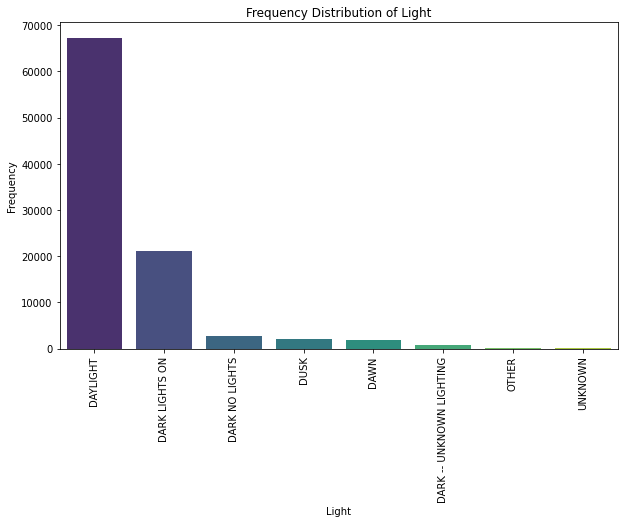

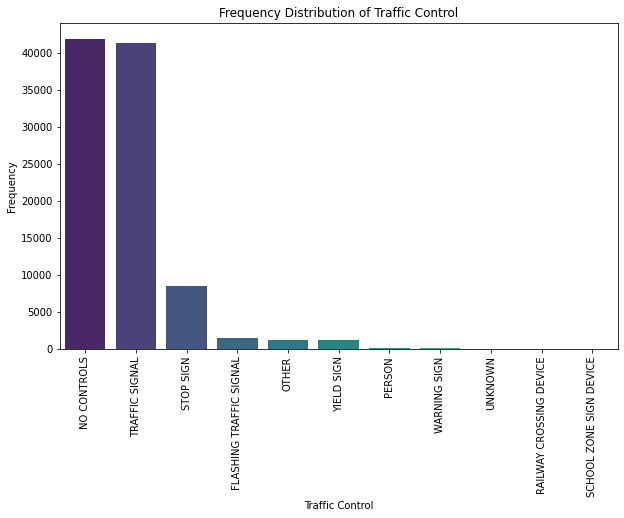

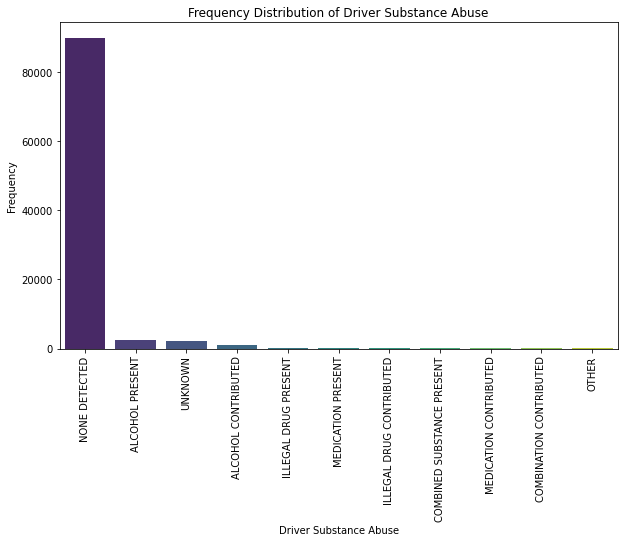

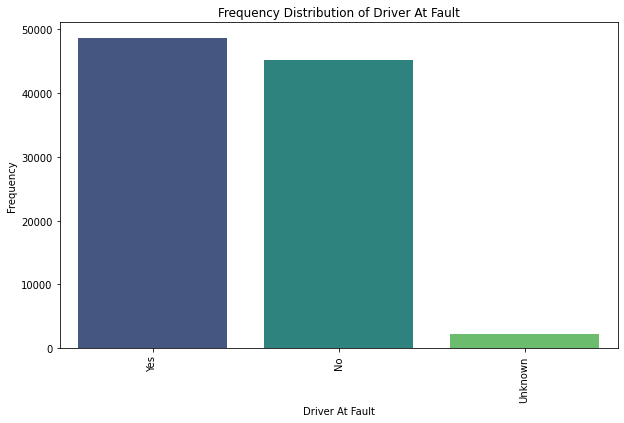

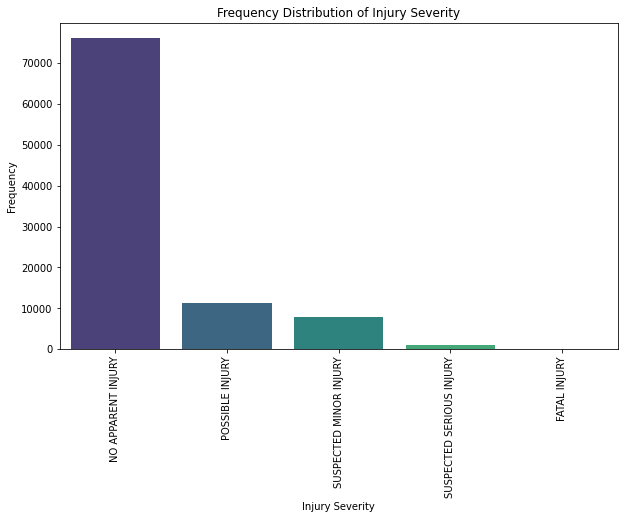

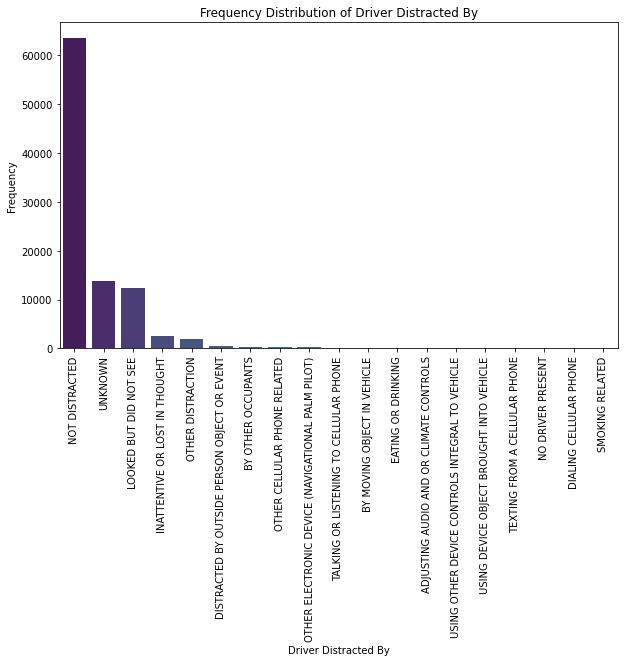

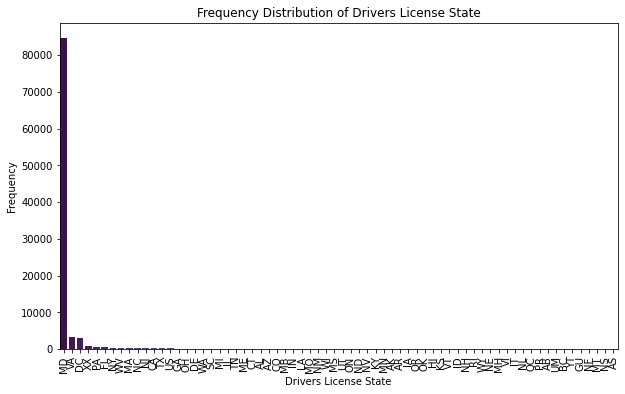

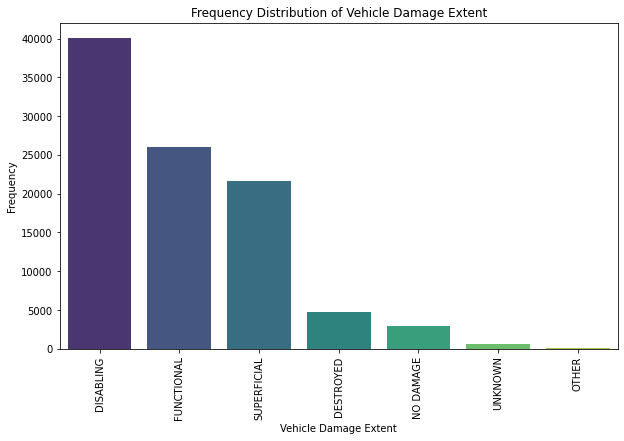

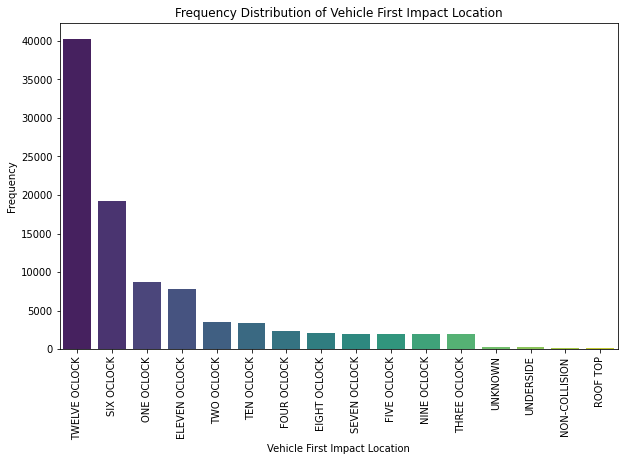

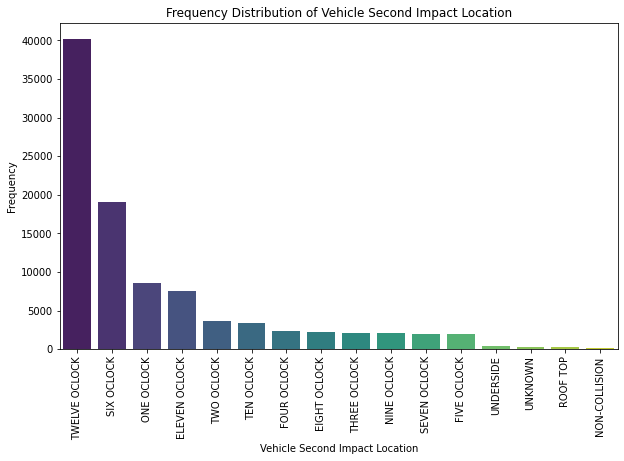

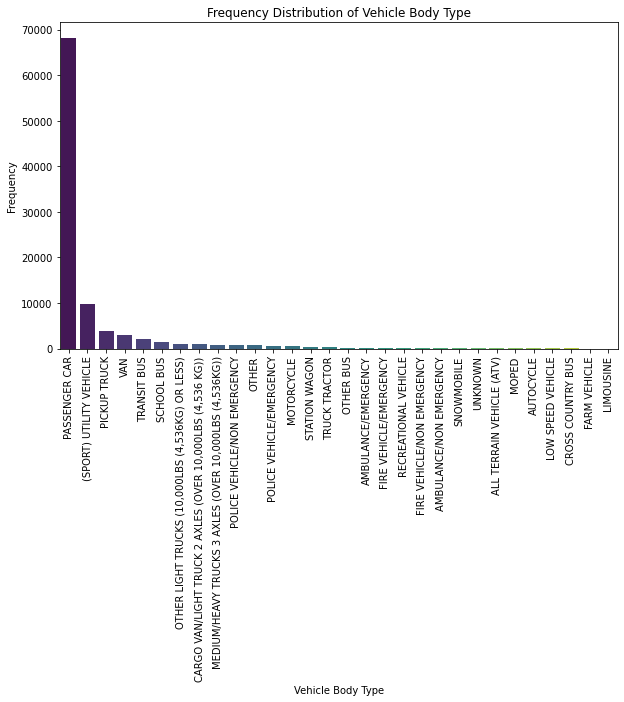

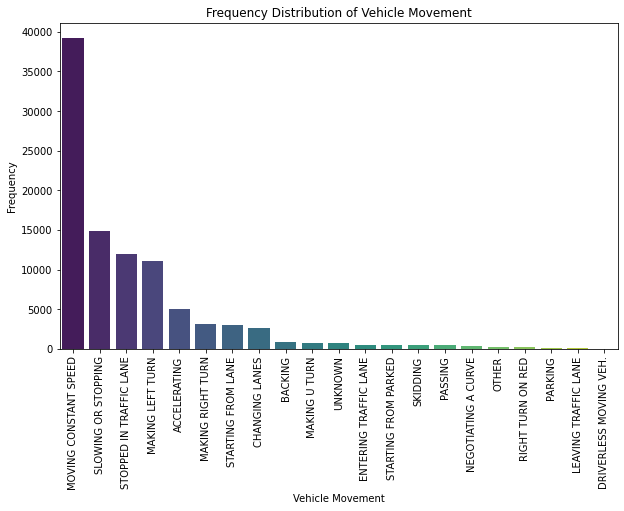

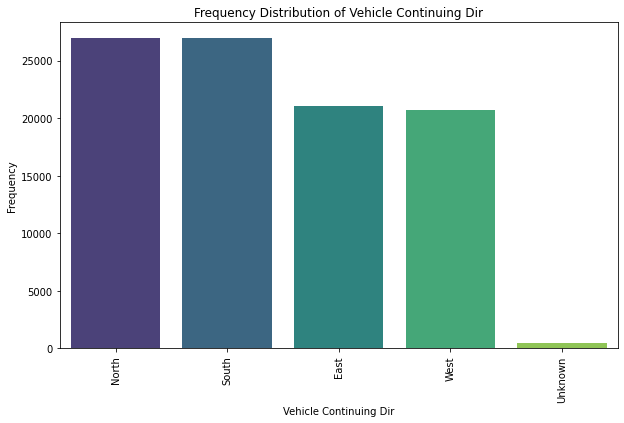

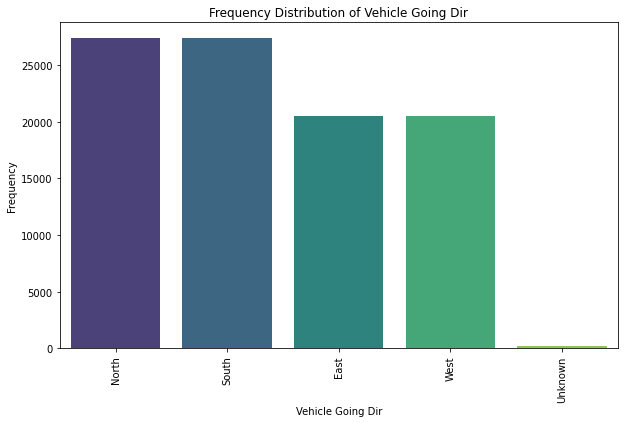

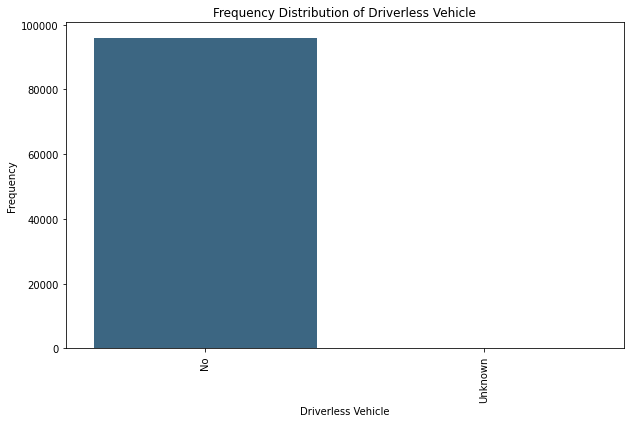

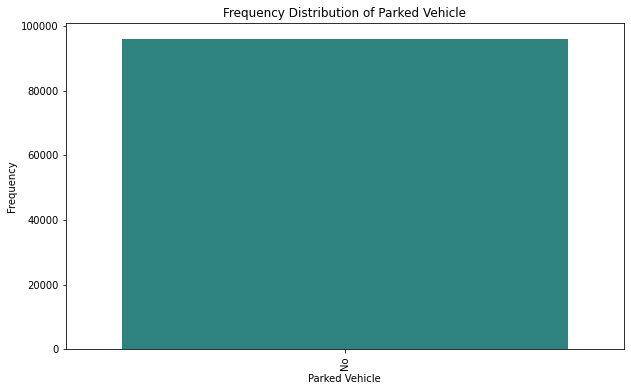

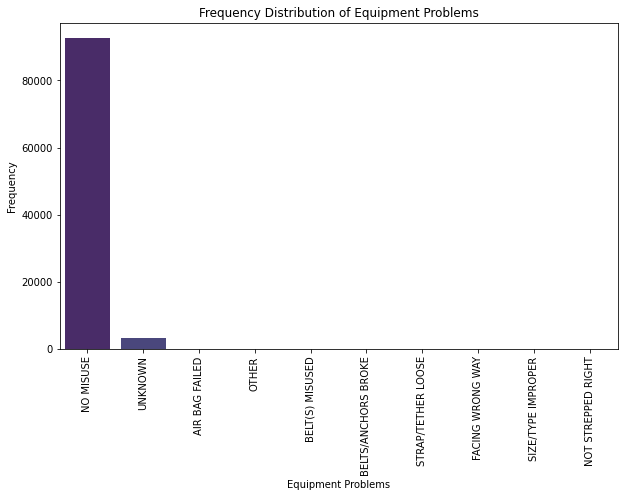

In [24]:
categorical_columns = df.select_dtypes(include=['object']).columns
exclude_columns = ['Local Case Number', 'Vehicle Make', 'Vehicle Model', 'Crash Time']
for col in categorical_columns:
    if col in exclude_columns:
        continue
    frequency_distribution = df[col].value_counts()    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=frequency_distribution.index, y=frequency_distribution.values, palette='viridis')    
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)    
    plt.show()


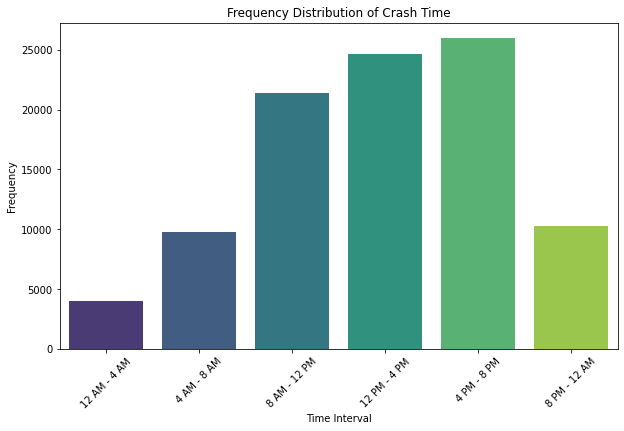

In [25]:
# Create a new DataFrame or Series for the categorized time intervals
time_bins = [0, 4, 8, 12, 16, 20, 24]  # Adjust as needed
time_labels = ['12 AM - 4 AM', '4 AM - 8 AM', '8 AM - 12 PM', '12 PM - 4 PM', '4 PM - 8 PM', '8 PM - 12 AM']
df['Time Interval'] = pd.cut(pd.to_datetime(df['Crash Time']).dt.hour, bins=time_bins, labels=time_labels, right=False)
# Create a countplot for the frequency distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time Interval', palette='viridis')
plt.title('Frequency Distribution of Crash Time')
plt.xlabel('Time Interval')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [26]:

from scipy.stats import chi2_contingency

# Create a DataFrame with categorical data
columns_for_correlation = ['Weather','Collision Type','Light','Traffic Control','Driver Substance Abuse','Driver Distracted By','Speed Limit', 'Time Interval', 'Surface Condition', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Driverless Vehicle', 'Driver At Fault']
data = df[columns_for_correlation]

# Define a function to calculate Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Create an empty correlation matrix
num_features = len(data.columns)
correlation_matrix = np.zeros((num_features, num_features))

# Calculate Cramer's V for each pair of categorical variables
for i in range(num_features):
    for j in range(num_features):
        if i == j:
            correlation_matrix[i, j] = 1.0
        else:
            correlation_matrix[i, j] = cramers_v(data.iloc[:, i], data.iloc[:, j])

# Create a DataFrame from the correlation matrix
correlation_df = pd.DataFrame(correlation_matrix, columns=data.columns, index=data.columns)

# Print or visualize the correlation matrix
print(correlation_df)


                                 Weather  Collision Type     Light  \
Weather                         1.000000        0.033107  0.102273   
Collision Type                  0.033107        1.000000  0.080334   
Light                           0.102273        0.080334  1.000000   
Traffic Control                 0.024512        0.159579  0.095747   
Driver Substance Abuse          0.036583        0.065231  0.096830   
Driver Distracted By            0.016175        0.053896  0.032346   
Speed Limit                     0.016590        0.069971  0.028727   
Time Interval                   0.070169        0.094952  0.382212   
Surface Condition               0.401440        0.042850  0.088735   
Injury Severity                 0.007276        0.092200  0.014549   
Vehicle Damage Extent           0.029109        0.175495  0.048259   
Vehicle First Impact Location   0.016671        0.207248  0.031379   
Vehicle Second Impact Location  0.017253        0.206421  0.032894   
Vehicle Body Type   

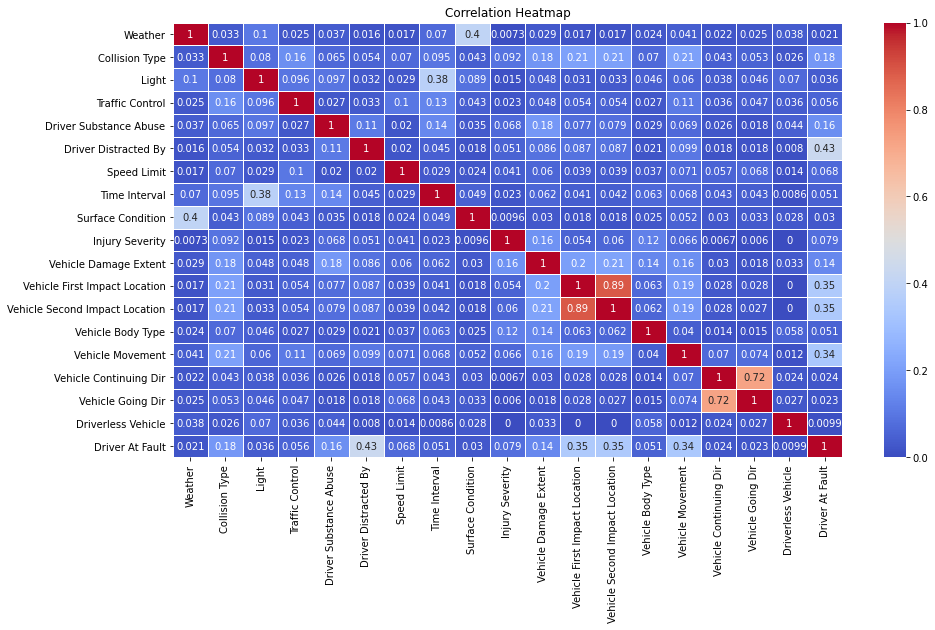

In [27]:
correlation_matrix = correlation_df
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder

In [41]:
# target column Driver At Fault
df['Driver At Fault'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [42]:
#num of unknown
(df['Driver At Fault']=='Unknown').sum()

2290

In [43]:
filtered_df = df[df['Driver At Fault'] != 'Unknown']

In [57]:
#select import features

columns_of_interest = ['Collision Type','Traffic Control','Driver Substance Abuse','Driver Distracted By','Speed Limit', 'Time Interval', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement']
X = filtered_df[columns_of_interest]
# y = filtered_df['Driver At Fault']  # Target variable
label_encoder = LabelEncoder()
filtered_df['Driver At Fault'] = label_encoder.fit_transform(filtered_df['Driver At Fault'])
y = filtered_df['Driver At Fault']  # Target variable
# Divide the data into columns
categorical_cols = ['Collision Type','Traffic Control','Driver Substance Abuse','Driver Distracted By', 'Time Interval', 'Injury Severity', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement'] 
numerical_cols = ['Speed Limit']

# Create a transformer
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse=False, drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline
from sklearn.pipeline import Pipeline

preprocessor = Pipeline(
    steps=[
        ('categorical', categorical_transformer)
    ]
)


C:\Users\37199\AppData\Local\Temp\ipykernel_12392\4064582936.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Driver At Fault'] = label_encoder.fit_transform(filtered_df['Driver At Fault'])


In [58]:
X_transformed = preprocessor.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [59]:
# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_dt_pred = dt_classifier.predict(X_test)
y_dt_pred_binary = label_encoder.transform(y_dt_pred)
dt_accuracy = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.8609066666666667


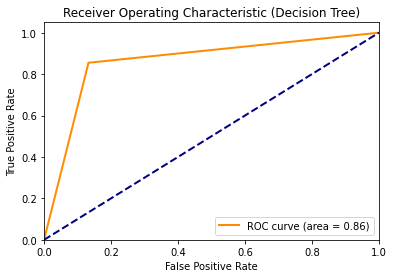

In [61]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_dt_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

D:\Minicanda\Miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


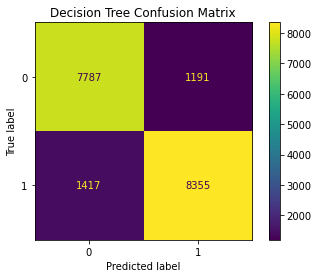

In [69]:
# Calculate the dt confusion matrix
dt_confusion = confusion_matrix(y_test, y_dt_pred)

# Plot the confusion matrix
plot_confusion_matrix(dt_classifier, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [70]:
# Create and train a Logistic Regression classifier
lr_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_lr_pred = lr_classifier.predict(X_test)
y_lr_pred_binary = label_encoder.transform(y_lr_pred)
lr_accuracy = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.8922133333333333


D:\Minicanda\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


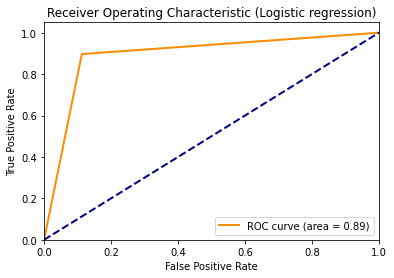

In [71]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_lr_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Logistic regression)')
plt.legend(loc="lower right")
plt.show()

D:\Minicanda\Miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


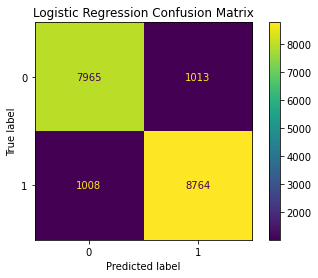

In [72]:
# Calculate the lg confusion matrix
lg_confusion = confusion_matrix(y_test, y_lr_pred)

# Plot the confusion matrix
plot_confusion_matrix(lr_classifier, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [73]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=1,  # Adjust the number of iterations
    cv=5
)

random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_

In [74]:
# Create and train a Random Forest classifier
best_rf_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf']
)

# Fit the model with the training data
best_rf_model.fit(X_train, y_train)

y_rf_pred = best_rf_model.predict(X_test)
y_rf_pred_binary = label_encoder.transform(y_rf_pred)
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8933333333333333


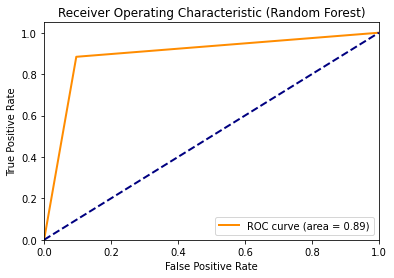

In [75]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_rf_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

D:\Minicanda\Miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


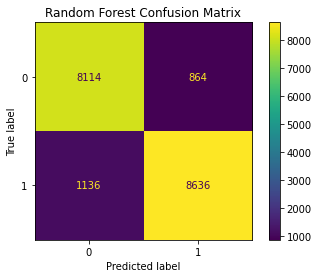

In [76]:
# Calculate the rf confusion matrix
rf_confusion = confusion_matrix(y_test, y_rf_pred)

# Plot the confusion matrix
plot_confusion_matrix(best_rf_model, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [77]:
# Create and train a Support Vector Machine (SVM) classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_svm_pred = svm_classifier.predict(X_test)
y_svm_pred_binary = label_encoder.transform(y_svm_pred)
svm_accuracy = accuracy_score(y_test, y_svm_pred)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.8789333333333333


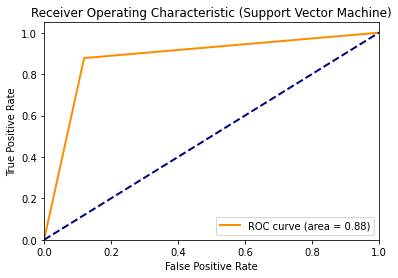

In [78]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_svm_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Support Vector Machine)')
plt.legend(loc="lower right")
plt.show()

D:\Minicanda\Miniconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


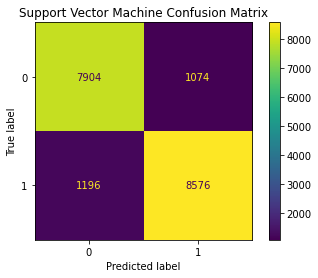

In [79]:
# Calculate the svm confusion matrix
svm_confusion = confusion_matrix(y_test, y_svm_pred)

# Plot the confusion matrix
plot_confusion_matrix(svm_classifier, X_test, y_test)
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import StackingClassifier

base_models = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True))
]


stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())


stacking_model.fit(X_train, y_train)


stacking_predictions = stacking_model.predict(X_test)
y_stack_pred_binary = label_encoder.transform(stacking_predictions)


stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print("Stacking Model Accuracy:", stacking_accuracy)

D:\Minicanda\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Minicanda\Miniconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [ ]:

# calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_stack_pred_binary)

# calculate ROC value
roc_auc = auc(fpr, tpr)

# plot AUC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Stack)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate the stack confusion matrix
stack_confusion = confusion_matrix(y_test, stacking_predictions)

# Plot the confusion matrix
plot_confusion_matrix(stacking_model, X_test, y_test)
plt.title('Stack Confusion Matrix')
plt.show()